# Data Modelling
***

### Classification Problem Algorithm:
#### Support Vector Machines

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

from imblearn.over_sampling import SMOTE

from imblearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [4]:
df = pd.read_csv('diabetes_encoded.csv')

In [5]:
df.set_index('encounter_id', inplace=True)
y = df['readmitted']
X = df.drop('readmitted', axis=1)

In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
print('Original training dataset shape {}'.format(Counter(y_train)))
print('Original testing dataset shape {}'.format(Counter(y_test)))

Original training dataset shape Counter({0: 43912, 1: 37500})
Original testing dataset shape Counter({0: 10952, 1: 9402})


In [7]:
from sklearn.dummy import DummyClassifier
# Train Dummy Classifier
baseline_model = DummyClassifier(strategy='most_frequent')
baseline_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [8]:
# Predict and evaluate Dummy Classifier
y_pred_base = baseline_model.predict(X_test)
base_accuracy = accuracy_score(y_test, y_pred_base)
print(f'Baseline Model Accuracy (Most Frequent Class): {base_accuracy}')

base_precision = precision_score(y_test, y_pred_base, average='binary')
base_recall = recall_score(y_test, y_pred_base, average='binary')
base_f1 = f1_score(y_test, y_pred_base, average='binary')

print(f'Baseline Model Precision: {base_precision}')
print(f'Baseline Model Recall: {base_recall}')
print(f'Baseline Model F1 Score: {base_f1}')

print(y.value_counts())

Baseline Model Accuracy (Most Frequent Class): 0.5380760538469097
Baseline Model Precision: 0.0
Baseline Model Recall: 0.0
Baseline Model F1 Score: 0.0
readmitted
0    54864
1    46902
Name: count, dtype: int64


C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
# handle class imbalance
# Initialize SMOTE and baseline model
smote = SMOTE(random_state=42)
baseline_model_smote = DummyClassifier(strategy='most_frequent')

# Create pipeline
pipeline = Pipeline([
    ('smote', smote),
    ('classifier', baseline_model_smote)
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate Dummy Classifier
y_pred_base_smote = pipeline.predict(X_test)
base_accuracy_smote = accuracy_score(y_test, y_pred_base_smote)
print(f'Baseline Model Accuracy (Most Frequent Class) with SMOTE: {base_accuracy_smote}')

base_precision_smote = precision_score(y_test, y_pred_base_smote, average='binary')
base_recall_smote = recall_score(y_test, y_pred_base_smote, average='binary')
base_f1_smote = f1_score(y_test, y_pred_base_smote, average='binary')

print(f'Baseline Model Precision with SMOTE: {base_precision_smote}')
print(f'Baseline Model Recall with SMOTE: {base_recall_smote}')
print(f'Baseline Model F1 Score with SMOTE: {base_f1_smote}')

print(y.value_counts())

Baseline Model Accuracy (Most Frequent Class) with SMOTE: 0.5380760538469097
Baseline Model Precision with SMOTE: 0.0
Baseline Model Recall with SMOTE: 0.0
Baseline Model F1 Score with SMOTE: 0.0
readmitted
0    54864
1    46902
Name: count, dtype: int64


C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
# Train Support Vector Machine model
svc_model = SVC(max_iter=5000)
svc_model.fit(X_train, y_train)

C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=5000)

In [11]:
# Predict and evaluate the standard metrics
y_pred_svc = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred_svc)
svc_precision = precision_score(y_test, y_pred_svc, average='binary')
svc_recall = recall_score(y_test, y_pred_svc, average='binary')
svc_f1 = f1_score(y_test, y_pred_svc, average='binary')
svc_auc = roc_auc_score(y_test, y_pred_svc)

print(f'Support Vector Machine Accuracy: {svc_accuracy}')
print(f'Support Vector Machine Precision: {svc_precision}')
print(f'Support Vector Machine Recall: {svc_recall}')
print(f'Support Vector Machine F1 Score: {svc_f1}')
print(f'Support Vector Machine AUC: {svc_auc}')

Support Vector Machine Accuracy: 0.5620516851724476
Support Vector Machine Precision: 0.5194639438417358
Support Vector Machine Recall: 0.6926185917889811
Support Vector Machine F1 Score: 0.5936730786762695
Support Vector Machine AUC: 0.5712910343897426


Randomly sample a fraction of the dataset. This is particularly useful for faster model training and hyperparameter tuning.

In [13]:
# Sample a fraction (e.g., 5%) of the dataset
subset = df.sample(frac=0.05, random_state=42)  # 5% of the data

# Split the subset into features and target
X_subset = subset.drop('readmitted', axis=1) 
y_subset = subset['readmitted']

In [14]:
# Cross-Validation
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()
svc_model_scaled = SVC(max_iter=1000, random_state=42)

# Create a pipeline that scales the data and then applies the SVC model
pipeline = make_pipeline(scaler, svc_model_scaled)

# Perform cross-validation
scores = cross_val_score(pipeline, X_subset, y_subset, cv=5, scoring='accuracy')

# Print cross-validation results
print(f'Cross-Validation Scores: {scores}')
print(f'Average Cross-Validation Accuracy: {scores.mean()}')

C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1

Cross-Validation Scores: [0.54420432 0.53634578 0.54911591 0.55752212 0.51720747]
Average Cross-Validation Accuracy: 0.5408791217282621


Model Optimisation

In [16]:
# Split data
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_subset, y_subset, train_size=0.8, random_state=42)
print('Sample training dataset shape {}'.format(Counter(y_train_sample)))
print('Sample testing dataset shape {}'.format(Counter(y_test_sample)))

Sample training dataset shape Counter({0: 2167, 1: 1903})
Sample testing dataset shape Counter({0: 552, 1: 466})


In [29]:
from scipy.stats import uniform

# Define the parameter distributions for SVC
param_distributions = {
    'C': uniform(0.001, 10-0.001),  # Regularization parameter
    'gamma': uniform(0.001, 10-0.001),  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'degree': [2, 3, 4]  # Degree of the polynomial kernel function (only used if kernel='poly')
}

# Initialize SVC model
svc_model = SVC(max_iter=1000, random_state=42, probability = True)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=svc_model,
    param_distributions=param_distributions,
    n_iter=10,  # Number of parameter settings to sample
    cv=5,  # Number of folds in cross-validation
    scoring='accuracy',  # Metric to optimize
    verbose=1,  # Verbosity level
    random_state=42  # For reproducibility
)

# Fit RandomizedSearchCV
random_search.fit(X_train_sample, y_train_sample)

# Print best parameters and best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1

Best parameters: {'C': 3.7460266483547775, 'degree': 2, 'gamma': 1.8351644638717717, 'kernel': 'linear'}
Best score: 0.49533169533169535


C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [47]:
# Train the final model
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the final model
y_pred_final = best_model.predict(X_test)
accuracy_final = accuracy_score(y_test, y_pred_final)
conf_matrix_final = confusion_matrix(y_test, y_pred_final)
class_report_final = classification_report(y_test, y_pred_final)

print(f'Optimised Accuracy: {accuracy_final}')
print('Optimised Confusion Matrix:')
print(conf_matrix_final)
print('Optimised Classification Report:')
print(class_report_final)

C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Optimised Accuracy: 0.44659526383020537
Optimised Confusion Matrix:
[[4063 6889]
 [4375 5027]]
Optimised Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.37      0.42     10952
           1       0.42      0.53      0.47      9402

    accuracy                           0.45     20354
   macro avg       0.45      0.45      0.45     20354
weighted avg       0.45      0.45      0.44     20354



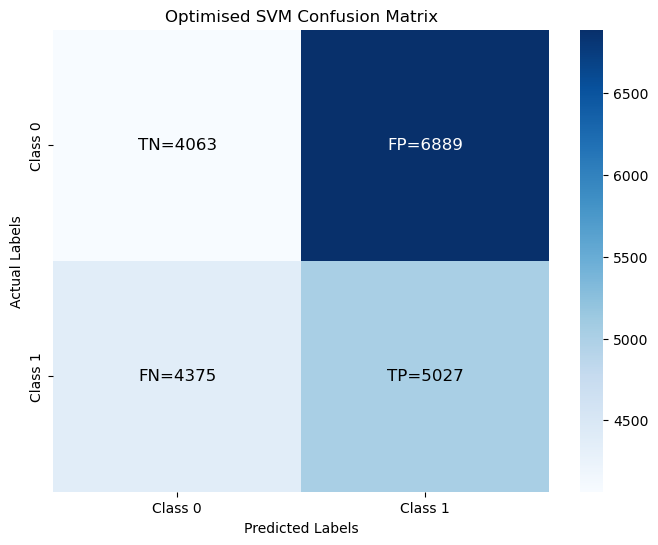

In [45]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_final, fmt='d', cmap='Blues', annot_kws={"size": 16},
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Optimised SVM Confusion Matrix')
# Add text annotations for TP, TN, FP, FN
plt.text(0.5, 0.5, 'TN={}'.format(conf_matrix_final[0, 0]), ha='center', va='center', color='black', fontsize=12)
plt.text(1.5, 0.5, 'FP={}'.format(conf_matrix_final[0, 1]), ha='center', va='center', color='white', fontsize=12)
plt.text(0.5, 1.5, 'FN={}'.format(conf_matrix_final[1, 0]), ha='center', va='center', color='black', fontsize=12)
plt.text(1.5, 1.5, 'TP={}'.format(conf_matrix_final[1, 1]), ha='center', va='center', color='black', fontsize=12)
plt.savefig('SVMafterHT.png', dpi=300)
plt.show()

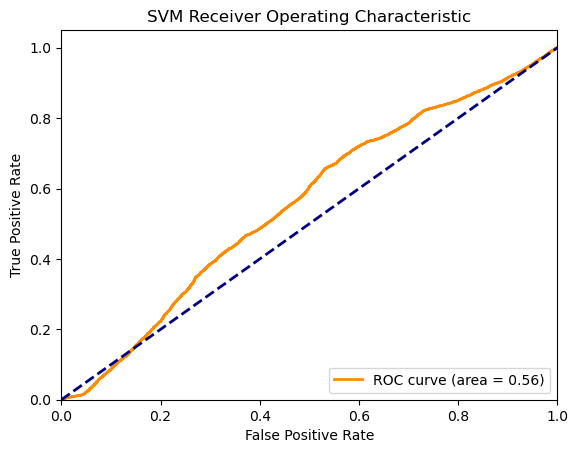

In [49]:
# Compute ROC curve and AUC for best model
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC.png', dpi=300)
plt.show()